# Modelos de regresion aplicando:
+ Regresion lineal
+ Ridge
+ GBR

In [44]:
# lectura de archivo y filtros o trasnformaciones
import numpy as np
import pandas as pd

# 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression,Ridge
from sklearn.metrics import (explained_variance_score,
                             mean_absolute_error,
                             mean_squared_error,
                             mean_squared_log_error,
                             median_absolute_error,
                             r2_score)

from sklearn.ensemble.partial_dependence import plot_partial_dependence
import plotly
import cufflinks
# visualizacion de datos
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams[u'figure.figsize'] = (16,8)

<img src='img1.png' />

In [45]:
df = pd.read_pickle('df_4_regresion_clean.pkl').reset_index(drop=True)

In [46]:
df.head()

,jugador,fecha_nacimiento_x,nacionalidad,equipo_x,posicion_1,posicion_2,posicion_3,minutos_jugados_pos1,minutos_jugados_pos2,minutos_jugados_pos3,...,ranking_restringido_pos1,ranking_restringido_pos2,ranking_restringido_pos3,value_2015,value_2016,edad,minutos_totales,ranking_promedio,ranking_restringido_promedio,cociente
0,"Abila, Ramon",1989-10-14,Argentina,Club Atlético Huracán,Delantero,Delantero con Movilidad,No aplica,2094.0,2094.0,0.0,...,2.281160,1.449713,0.0,0.400,0.400,26.0,2094.0,1.865437,1.865437,1.000000
1,"Acevedo, Nelson",1988-07-11,Argentina,Club Atlético Unión (Santa Fe),Volante defensivo,Volante Mixto,No aplica,699.0,699.0,0.0,...,8.114807,6.786695,0.0,0.075,0.225,28.0,699.0,7.450751,7.450751,3.000000
2,"Acosta, Lautaro",1988-03-14,Argentina,Club Atlético Lanús,Volante por izquierda,Volante Mixto,No aplica,1842.0,1842.0,0.0,...,3.784080,3.557492,0.0,1.800,2.000,28.0,1842.0,3.670786,3.670786,1.111111
3,"Acuna, Marcos",1991-10-28,Argentina,Racing Club,Volante por derecha,Volante Mixto,No aplica,1557.0,1557.0,0.0,...,4.772254,5.514451,0.0,0.050,2.000,24.0,1557.0,5.143353,5.143353,40.000000
4,"Acuna, Walter",1992-03-04,Argentina,Club Olimpo,Volante Mixto,Volante ofensivo,No aplica,738.0,738.0,0.0,...,2.763415,2.701220,0.0,0.700,2.000,24.0,738.0,2.732317,2.732317,2.857143


In [47]:
cols_cat = ['nacionalidad','equipo_x','posicion_1','posicion_2','posicion_3']

In [48]:
# se generan dos dataframes una quitando una variable dummi de cada categoria.
df_dummi_first_drop = pd.get_dummies(df,columns=cols_cat,drop_first=True)

In [49]:
x_reg = ['minutos_jugados_pos1','minutos_jugados_pos2', 'minutos_jugados_pos3','minutos_totales',
         
    'ranking_pos1','ranking_pos2', 'ranking_pos3', 'ranking_promedio',
         
    'ranking_restringido_pos1','ranking_restringido_pos2', 'ranking_restringido_pos3','ranking_restringido_promedio',
         
    'value_2015', 
         
    'edad', 
     # Nacionalidad    
    'nacionalidad_Chilena','nacionalidad_Colombiana', 'nacionalidad_Ecuatoriana','nacionalidad_Paraguaya', 'nacionalidad_Uruguaya',
     # Equipo    
    'equipo_x_Asociación Atlética Argentinos Juniors','equipo_x_Atlético de Rafaela', 'equipo_x_Club Atlético Aldosivi',
       'equipo_x_Club Atlético Banfield', 'equipo_x_Club Atlético Belgrano',
       'equipo_x_Club Atlético Boca Juniors', 'equipo_x_Club Atlético Colón',
       'equipo_x_Club Atlético Huracán','equipo_x_Club Atlético Independiente', 'equipo_x_Club Atlético Lanús',
       "equipo_x_Club Atlético Newell's Old Boys",'equipo_x_Club Atlético Patronato',
       'equipo_x_Club Atlético River Plate',
       'equipo_x_Club Atlético Rosario Central',
       'equipo_x_Club Atlético San Lorenzo de Almagro',
       'equipo_x_Club Atlético San Martín (SJ)',
       'equipo_x_Club Atlético Sarmiento (Junin)',
       'equipo_x_Club Atlético Temperley', 'equipo_x_Club Atlético Tigre',
       'equipo_x_Club Atlético Tucumán',
       'equipo_x_Club Atlético Unión (Santa Fe)',
       'equipo_x_Club Atlético Vélez Sarsfield',
       'equipo_x_Club Deportivo Godoy Cruz Antonio Tomba',
       'equipo_x_Club Estudiantes de La Plata', 'equipo_x_Club Olimpo',
       'equipo_x_Club de Gimnasia y Esgrima La Plata',
       'equipo_x_Defensa y Justicia', 'equipo_x_Quilmes Atlético Club',
       'equipo_x_Racing Club',
         # Posiciones
    'posicion_1_Delantero',
    'posicion_1_Lateral por derecha', 'posicion_1_Lateral por izquierda',
    'posicion_1_Volante Mixto ', 'posicion_1_Volante defensivo',
    'posicion_1_Volante por derecha', 'posicion_1_Volante por izquierda',
    'posicion_2_Delantero con Movilidad', 'posicion_2_Lateral por derecha',
    'posicion_2_Lateral por izquierda', 'posicion_2_No aplica',
    'posicion_2_Volante Mixto ', 'posicion_2_Volante defensivo',
    'posicion_2_Volante ofensivo',
    'posicion_3_Volante Mixto ','posicion_3_Volante ofensivo']

y = 'value_2016'

# Para generar las regresiones se tiene que estandarizar los valores

$\frac{X - mean} {std}$

Quitando estandarizacion

$(X*std) + mean$

In [50]:
mean = df_dummi_first_drop[x_reg].mean()
std = df_dummi_first_drop[x_reg ].std()
df_reg_std = (df_dummi_first_drop[x_reg] - mean)/std

In [51]:
df_reg_std = pd.concat([df_reg_std,df_dummi_first_drop.value_2016],1)

# Se parte en conjuntos de entrenamiento, prueba y validacion

In [11]:
x_train_test,x_valid, y_train_test,y_valid = train_test_split(
    df_reg_std[x_reg], df_reg_std[y], test_size=0.1, random_state = 8)

x_train,x_test, y_train,y_test = train_test_split(
    x_train_test, y_train_test, test_size=0.1, random_state = 8)

# Regresion Lineal

In [12]:
linear_reg = LinearRegression().fit(x_train, y_train)

## Interpretacion

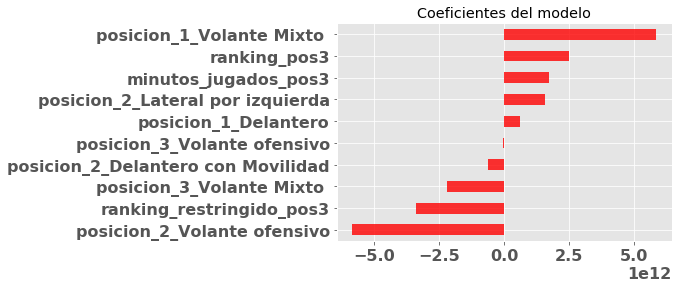

In [13]:
coef = pd.Series(linear_reg.coef_, index = x_train.columns).sort_values()
imp_coef = pd.concat([coef.head(5), coef.tail(5)])
imp_coef.plot(kind = "barh", color='r',alpha=0.8)
plt.title("Coeficientes del modelo");

_CLARAMENTE HAY QUE PENALIZAR LAS VARIABLES_

## Evaluacion

In [52]:
y_pred = linear_reg.predict(x_test)

print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
res = abs(y_test - y_pred)/y_test
print('epp',res.mean()*100)
print('r_2',r2_score(y_test,y_pred));

RMSE 0.9000559241509501
epp 71.32853156737418
r_2 0.4646138280916393


# Regresion Ridge

In [67]:
ridge_reg = Ridge().fit(x_train, y_train)

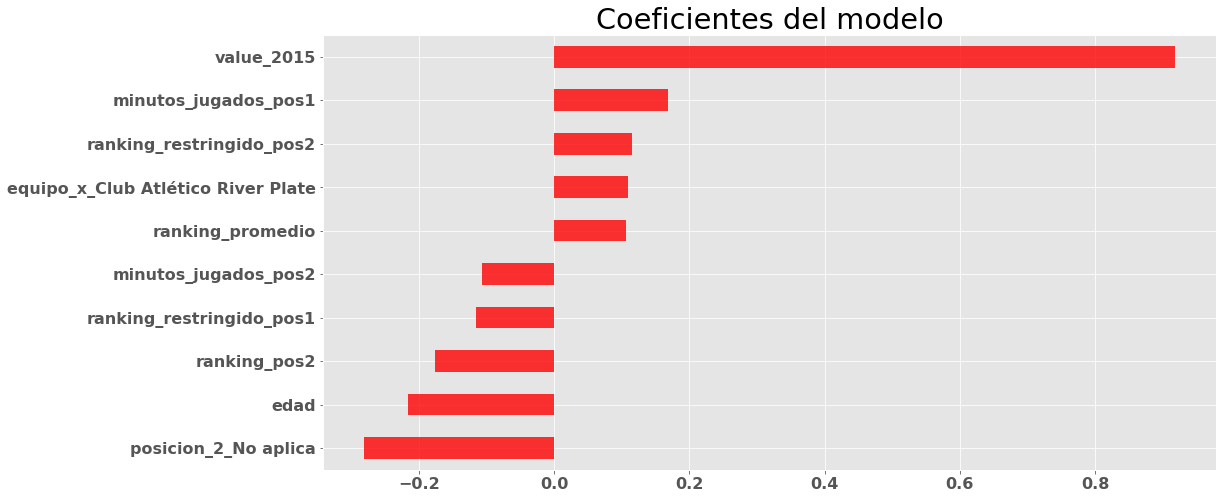

In [68]:
coef = pd.Series(ridge_reg.coef_, index = x_train.columns).sort_values()
imp_coef = pd.concat([coef.head(5), coef.tail(5)])
imp_coef.plot(kind = "barh", color='r',alpha=0.8)
plt.title("Coeficientes del modelo");

# SIGUE DANDO RARO En los rankings 2 LO DEMAS LO VEO BIEN

In [70]:
print("====",'TEST','====')
y_pred = ridge_reg.predict(x_test)

print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
res = abs(y_test - y_pred)/y_test
print('epp',res.mean()*100)
print('r_2',r2_score(y_test,y_pred))

print("====",'VALID','====')
y_pred = ridge_reg.predict(x_valid)

print('RMSE',np.sqrt(mean_squared_error(y_valid,y_pred)))
res = abs(y_valid - y_pred)/y_valid
print('epp',res.mean()*100)
print('r_2',r2_score(y_valid,y_pred));

==== TEST ====
RMSE 0.8938304496359682
epp 71.90764126271976
r_2 0.47199449406661376
==== VALID ====
RMSE 0.9280574735062497
epp 77.08963860865556
r_2 0.8176680976708466


## Optimizacion de metaparametros

In [71]:
# tamanio de lambda
grid_lambda = np.linspace(0.0000001, 40, 500)
NT = len(grid_lambda)
#matriz para guardar resultado de ecm
mse_error = np.zeros((NT))

for j,alpha in enumerate(grid_lambda):
    ridge_reg = Ridge(alpha=alpha)

# hacer unestimación sobre train
    ridge_reg.fit(x_train, y_train)
# hagamos un predict: tst
    rmse_test = np.sqrt(mean_squared_error(y_test, ridge_reg.predict(x_test)))
# y guardemos
    mse_error[j] = rmse_test
#     print("iteracion:",j+1,"valor de alpha:", alpha,"error:", rmse_test)

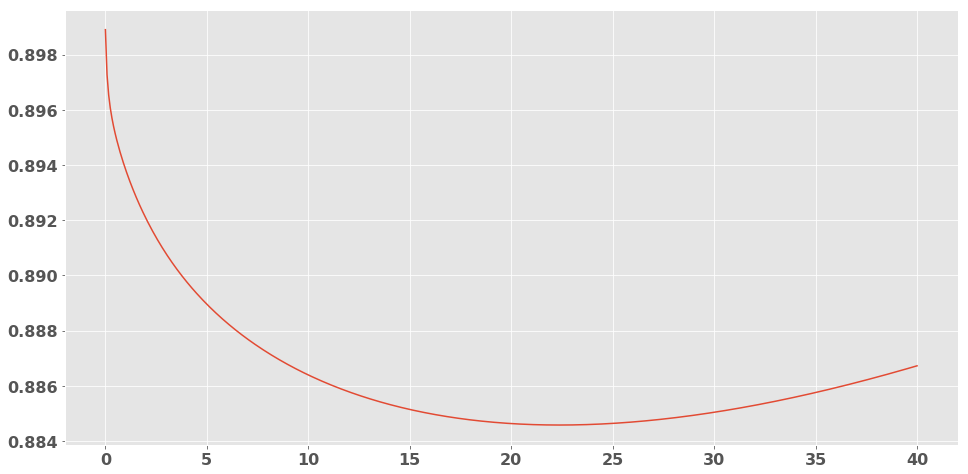

In [72]:
pd.DataFrame(mse_error,index=grid_lambda).plot(legend=False)

In [73]:
min_value_lambda = pd.DataFrame(mse_error,index=grid_lambda).idxmin()[0]

In [74]:
min_value_lambda

22.36472950300601

In [75]:
ridge_reg = Ridge(alpha=min_value_lambda).fit(x_train, y_train)

# Interpretacion

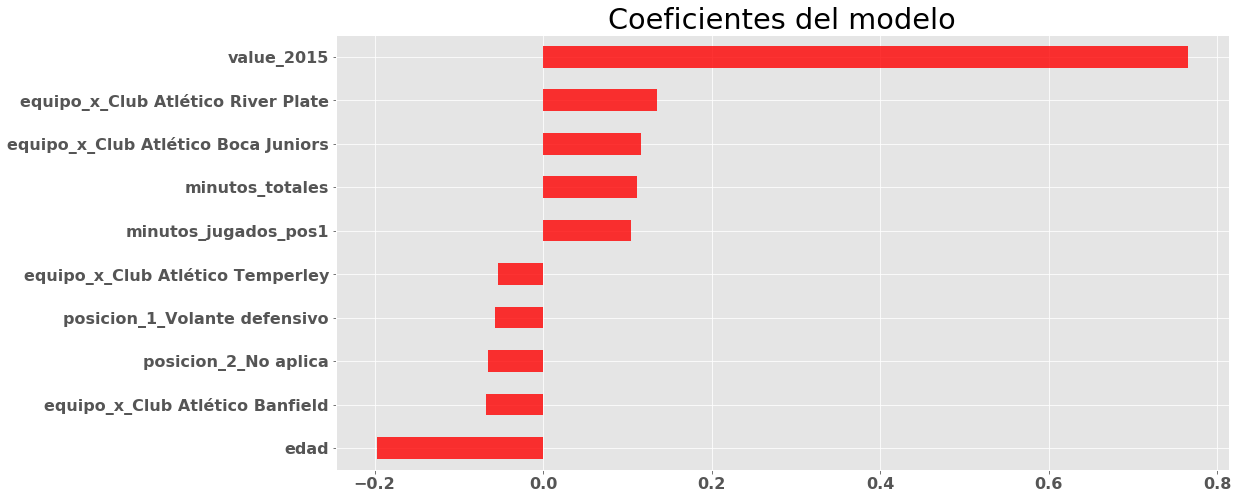

In [76]:
coef = pd.Series(ridge_reg.coef_, index = x_train.columns).sort_values()
imp_coef = pd.concat([coef.head(5), coef.tail(5)])
imp_coef.plot(kind = "barh", color='r',alpha=0.8)
plt.title("Coeficientes del modelo");

In [77]:
print("====",'TEST','====')
y_pred = ridge_reg.predict(x_test)

print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
res = abs(y_test - y_pred)/y_test
print('epp',res.mean()*100)
print('r_2',r2_score(y_test,y_pred))

print("====",'VALID','====')
y_pred = ridge_reg.predict(x_valid)

print('RMSE',np.sqrt(mean_squared_error(y_valid,y_pred)))
res = abs(y_valid - y_pred)/y_valid
print('epp',res.mean()*100)
print('r_2',r2_score(y_valid,y_pred));

==== TEST ====
RMSE 0.8845797490917652
epp 74.63861003898145
r_2 0.4828671269247031
==== VALID ====
RMSE 0.818140241431703
epp 79.1869594985776
r_2 0.8583004641956952


Text(0.5, 1.0, 'Real vs Prediccion VALID plot')

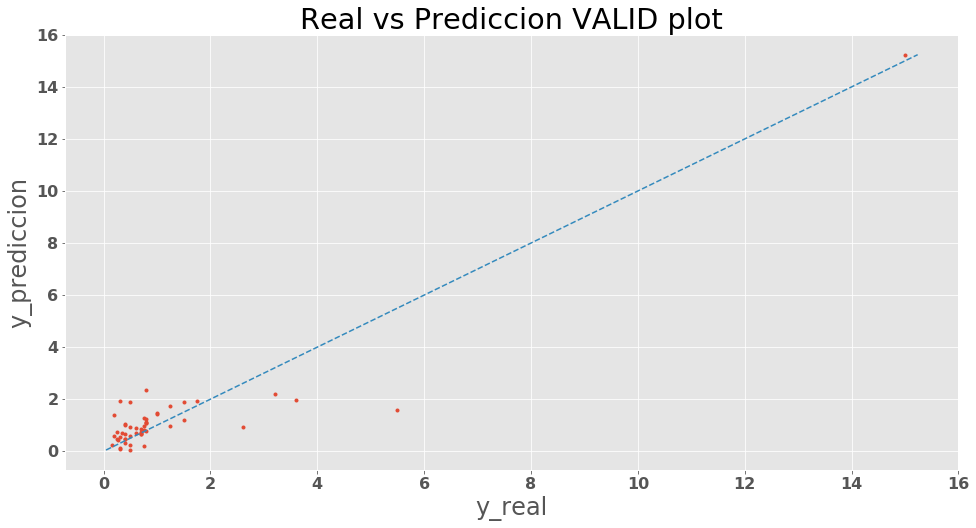

In [79]:
plt.plot(y_valid,y_pred,'.')
plt.plot([y_pred.min(),y_pred.max()],[y_pred.min(),y_pred.max()], '--')
plt.xlabel('y_real')
plt.ylabel('y_prediccion')
plt.title('Real vs Prediccion VALID plot')

In [150]:
jug_pred = df_dummi_first_drop.sample(5).index.values
df_dummi_first_drop.iloc[jug_pred]

,jugador,fecha_nacimiento_x,minutos_jugados_pos1,minutos_jugados_pos2,minutos_jugados_pos3,ranking_pos1,ranking_pos2,ranking_pos3,ranking_restringido_pos1,ranking_restringido_pos2,...,posicion_1_Volante por izquierda,posicion_2_Delantero con Movilidad,posicion_2_Lateral por derecha,posicion_2_Lateral por izquierda,posicion_2_No aplica,posicion_2_Volante Mixto,posicion_2_Volante defensivo,posicion_2_Volante ofensivo,posicion_3_Volante Mixto,posicion_3_Volante ofensivo
295,"Mendoza, Diego",1992-09-30,1021.0,1021.0,0.0,2.346964,1.085113,0.0,2.346964,1.085113,...,0,1,0,0,0,0,0,0,0,0
198,"Gago, Fernando",1986-04-10,1066.0,1066.0,0.0,9.322936,8.896998,0.0,9.322936,8.896998,...,0,0,0,0,0,1,0,0,0,0
161,"Faravelli, Lorenzo",1993-12-29,151.0,151.0,0.0,4.714570,3.516556,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
234,"Izaguirre, Santiago",1994-07-30,265.0,0.0,0.0,8.437245,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
247,"Lema, Cristian",1990-03-24,2196.0,0.0,0.0,7.509795,0.000000,0.0,7.509795,0.000000,...,0,0,0,0,1,0,0,0,0,0


In [151]:
all_predict = pd.DataFrame()
all_predict['jugadores'] = df_dummi_first_drop.iloc[jug_pred].jugador
all_predict['valor_real'] = df_dummi_first_drop.iloc[jug_pred].value_2016
all_predict['valor_predicho'] = np.round(gs_gbc.predict(df_dummi_first_drop.iloc[jug_pred][x_reg]),2)

all_predict

,jugadores,valor_real,valor_predicho
295,"Mendoza, Diego",0.40,0.38
198,"Gago, Fernando",4.20,4.03
161,"Faravelli, Lorenzo",0.30,0.32
234,"Izaguirre, Santiago",0.05,0.21
247,"Lema, Cristian",1.30,1.00


# Evaluacion de modelos

In [114]:
model_1 = {'model': 'modelo_cn_ranking_and_ranking_restringido',
    'rmse': 1.13,
    'r_2': 0.73,
    'epp': 60.5}
model_2 = {'model': 'modelo_cn_ranking',
    'rmse': 1.20,
    'r_2': 0.69,
    'epp': 61.4}
model_3 = {'model': 'modelo_cn_ranking_restringido',
    'rmse': 1.13,
    'r_2': 0.73,
    'epp': 60.6}
model_4 = {'model': 'modelo_sin_rankings',
    'rmse': 1.20,
    'r_2': 0.69,
    'epp': 61.3}
model_5 = {'model': 'modelo_cn_variables_extras',
    'rmse': 0.814,
    'r_2': 0.85,
    'epp': 79.1}

In [115]:
tabla_eval = pd.DataFrame([model_1,model_2,model_3,model_4,model_5])

In [119]:
gruped_eval = tabla_eval.groupby('model').sum()
gruped_eval.iplot(kind='bar',title='Evaluacion de modelos')

/home/serch/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



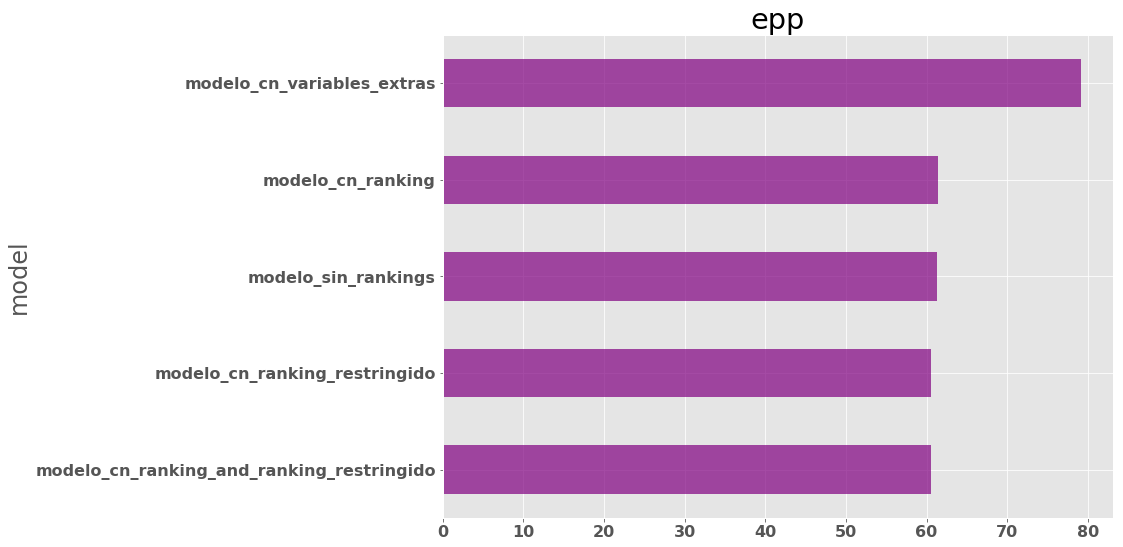

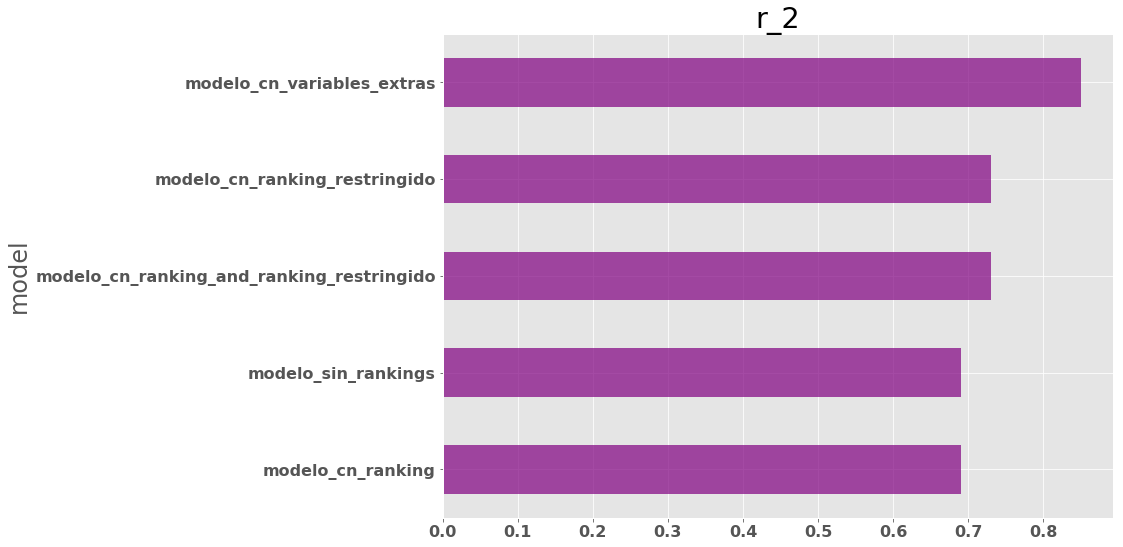

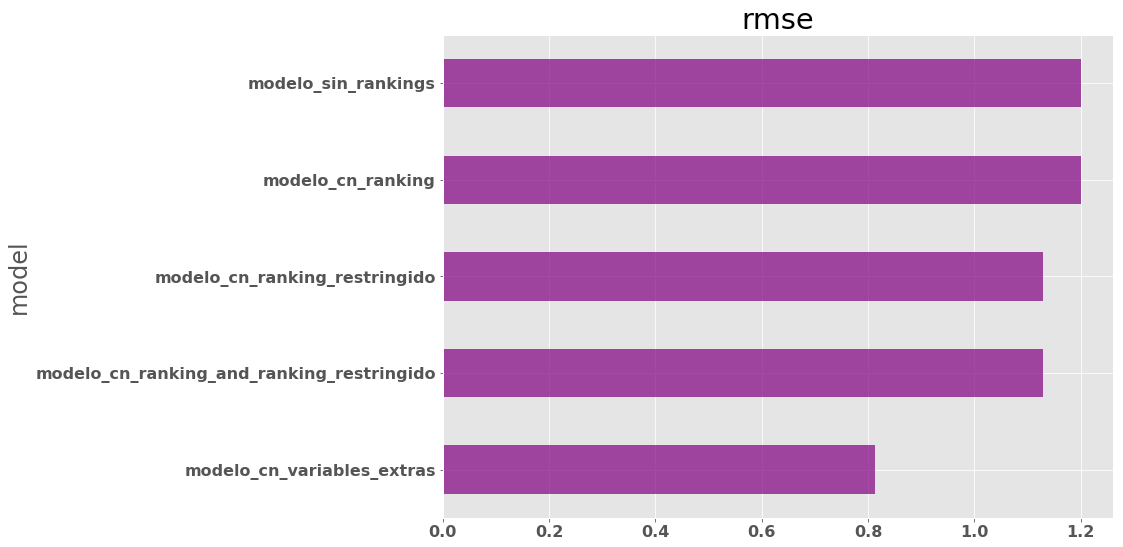

In [117]:
for i in gruped_eval.columns:
    plt.subplots()
    gruped_eval[i].sort_values().plot.barh(title=i,color='purple',alpha=0.7)
    plt.tight_layout()

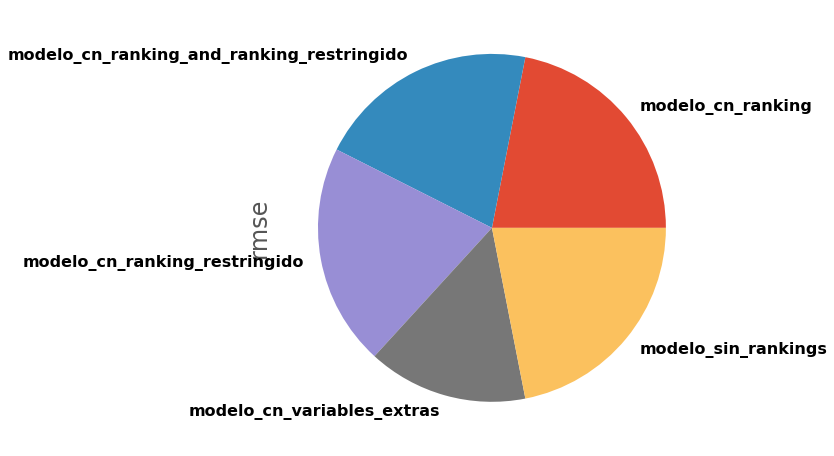

In [118]:
tabla_eval.groupby('model').sum()['rmse'].plot.pie()